# Köningsberg bridges

![""](Koningsberg-bridges.png)

**Euler** was asked to find a nice path across the seven Köningsberg bridges that visits the 

![](Koningsberg-graph.png)

# Definition
A graph G = (V, E) is 
- a pair of vertices (or nodes) V, and
- a set of edges E, 
- both assumed finite i.e. 
- |V| = n and |E| = m.

# Graph Representation
!["Sample Directed Graph](sample-graph.png)
* adjacency matrix
* adjacency list
* adjacency set
* adjacency dictionary
* left-child right sibling

We are sticking to **adjacency sets**. Their benefits: 
* as compact as adjacency lists for **sparse** graphs
* O(1) look up, because sets!

## Density of a graph:

\begin{equation*}
D = \frac{2|E|}{|V|\,(|V|-1)}
\end{equation*}


### Sparse graph:
\begin{equation*}
|E| = O(|V|)
\end{equation*}

![](sparse-graph.png)

### Dense graph:
\begin{equation*}
|E| = O(|V|^2)
\end{equation*}
![](complete-graph.png)

In [50]:
G = {
'a': set('bcdef'),
'b': set('ce'),
'c': set('d'),
'd': set('e'),
'e': set('f'),
'f': set('cgh'),
'g': set('fh'),
'h': set('fg')
}

In [45]:
G

{'a': {'b', 'c', 'd', 'e', 'f'},
 'b': {'c', 'e'},
 'c': {'d'},
 'd': {'e'},
 'e': {'f'},
 'f': {'c', 'g', 'h'},
 'g': {'f', 'h'},
 'h': {'f', 'g'}}

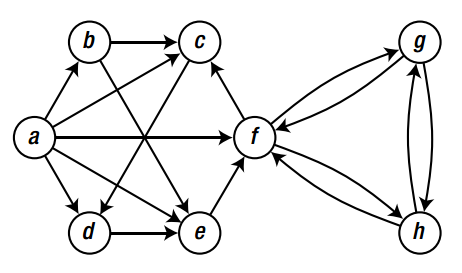

In [11]:
from IPython.display import Image
Image(filename='sample-graph.png')

## Is node a is connected to node b?

In [46]:
'b' in G['a']  # O(1)

True

In [47]:
len(G['a'])  # degree of node a (how many nodes are connected to node a)

5

## Adjacency Matrix 

In [41]:
a, b, c, d, e, f, g, h = range(8)
# a b c d e f g h
G = [
    [0,1,1,1,1,1,0,0], # a
    [0,0,1,0,1,0,0,0], # b
    [0,0,0,1,0,0,0,0], # c
    [0,0,0,0,1,0,0,0], # d
    [0,0,0,0,0,1,0,0], # e
    [0,0,1,0,0,0,1,1], # f
    [0,0,0,0,0,1,0,1], # g
    [0,0,0,0,0,1,1,0]  # h 
] 

In [42]:
G[a][b]  # is b connected to a

1

In [43]:
sum(G[a]) # degree of node a (how many nodes are connected to node a)

5

# Graph Theory Applications

# What we are going to talk about:
- Traversal
- Breadth First Search
- Depth First Search
- Topological Sorting
- Minimum Spanning Tree

## Traversal:

In [81]:
import time
import pprint
def walk(G, sink):                                    # Walk the graph from node s
    Predecessors, Q = dict(), set()                   # Predecessors + "to do" queue
    Predecessors[sink] = None                         # s has no predecessor
    Q.add(sink)                                       # We plan on starting with s
    while Q:                                          # Still nodes to visit
        u = Q.pop()                                   # Pick one, arbitrarily
        print("Examining node {}".format(u))
        time.sleep(2)
        for v in G[u].difference(Predecessors):       # New nodes?
            print("----Adding node {} to queue".format(v))
            time.sleep(2)
            Q.add(v)                                  # We plan to visit them!
            Predecessors[v] = u                       # Remember where we came from
        else:
            print("=======")
    return Predecessors                               # The traversal tree

In [84]:
traversal_path = walk(G,'a')
pprint.pprint(traversal_path)

Examining node a
----Adding node b to queue
----Adding node d to queue
----Adding node e to queue
----Adding node c to queue
----Adding node f to queue
Examining node e
Examining node c
Examining node f
----Adding node h to queue
----Adding node g to queue
Examining node h
Examining node g
Examining node b
Examining node d
{'a': None,
 'b': 'a',
 'c': 'a',
 'd': 'a',
 'e': 'a',
 'f': 'a',
 'g': 'f',
 'h': 'f'}


## Notes:
- nodes are arbitrarily selected from the queue
- when adding new nodes, only add the ones that are not already visited
- predecessors are dictionary so that you can rebuild the path from the sink to the node

## Question: 
Is there a nice path across the seven Köningsberg bridges that crosses each bridge only once and returns to the starting point?
#### - Answer: 
No
#### - Why?
**Euler** proved that a necessary condition for the existence of such path is that all vertices in the graph have an even degree